# Análisis exploratorio de datos.
<mark>*Con datos climaticos del INTA*</mark>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# opciones
pd.set_option("display.max_columns", 100)

In [2]:
df, df_estaciones = pd.read_parquet('../data/datos-todas-estaciones.parquet'), pd.read_csv('../data/estaciones-meteorologicas-inta.csv')

df.shape, df_estaciones.shape

((923867, 38), (169, 12))

## Análisis para el dataframe de los datos climaticos.

Para hacer más facil el tratamiento de las columnas, voy a normalizar los nombres a minusculas.

In [3]:
df.columns = [col.lower().strip() for col in df.columns]
df.columns

Index(['fecha', 'temperatura_abrigo_150cm', 'temperatura_abrigo_150cm_maxima',
       'temperatura_abrigo_150cm_minima', 'temperatura_intemperie_5cm_minima',
       'temperatura_intemperie_50cm_minima', 'temperatura_suelo_5cm_media',
       'temperatura_suelo_10cm_media', 'temperatura_inte_5cm',
       'temperatura_intemperie_150cm_minima', 'humedad_suelo',
       'precipitacion_pluviometrica', 'precipitacion_cronologica',
       'precipitacion_maxima_30minutos', 'heliofania_efectiva',
       'heliofania_relativa', 'tesion_vapor_media', 'humedad_media',
       'humedad_media_8_14_20', 'rocio_medio', 'duracion_follaje_mojado',
       'velocidad_viento_200cm_media', 'direccion_viento_200cm',
       'velocidad_viento_1000cm_media', 'direccion_viento_1000cm',
       'velocidad_viento_maxima', 'presion_media', 'radiacion_global',
       'horas_frio', 'unidades_frio', 'id_estacion', 'granizo', 'nieve',
       'radiacion_neta', 'evaporacion_tanque', 'evapotranspiracion_potencial',
       'pro

### 1. Entender la estructura del dataset
- Revisar dimensiones: `shape` (número de filas y columnas).  
- Ver primeras y últimas filas: `head()`, `tail()`.  
- Tipos de datos: `dtypes`, `info()`.  
- Identificar variables: **categóricas, numéricas, de fecha, texto**.  

In [4]:
df.shape

(923867, 38)

In [5]:
df.head()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
0,2009-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-08-07 00:00:00.0,9.572915,12.3,7.3,NaN,NaN,NaN,9.702779,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,9.712307,83.0,81.0,6.544751,NaN,NaN,,NaN,,NaN,NaN,NaN,1.494000,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-08-08 00:00:00.0,8.314584,17.4,1.7,NaN,NaN,NaN,9.373611,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,8.052779,81.0,77.0,3.762041,NaN,NaN,,NaN,,NaN,NaN,NaN,13.612010,13.363010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-08-09 00:00:00.0,7.433333,17.1,0.8,NaN,NaN,NaN,8.793056,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.681013,77.0,73.0,3.135792,NaN,NaN,,NaN,,NaN,NaN,NaN,13.944010,13.944010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-08-10 00:00:00.0,11.295140,22.2,3.9,NaN,NaN,NaN,8.979861,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.810816,58.0,52.0,3.396338,NaN,NaN,,NaN,,NaN,NaN,NaN,7.801996,3.236999,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
923862,2025-09-07 00:00:00.0,12.70,23.9,1.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.2,44.52,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,12.883305,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923863,2025-09-08 00:00:00.0,17.75,29.2,6.3,5.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.40,NaN,NaN,NaN,NaN,NaN,1.984584,None,2.480729,None,NaN,NaN,19.839062,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923864,2025-09-09 00:00:00.0,17.00,29.5,4.5,3.0,NaN,22.199999,21.699999,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.25,10.844036,NaN,43.0,8.069238,NaN,6.966665,None,8.708331,N,NaN,NaN,19.952995,NaN,NaN,NH0550,0.0,0.0,6.939761,NaN,3.399957,NaN,NaN
923865,2025-09-10 00:00:00.0,22.95,35.5,10.4,6.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.5,80.78,NaN,NaN,NaN,NaN,NaN,4.965418,None,6.206773,None,NaN,NaN,19.330389,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923866,2025-09-11 00:00:00.0,21.05,29.4,12.7,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.1,77.18,NaN,NaN,NaN,NaN,NaN,2.246251,None,2.807814,None,NaN,NaN,18.846680,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   fecha                                923867 non-null  object 
 1   temperatura_abrigo_150cm             863320 non-null  float64
 2   temperatura_abrigo_150cm_maxima      865103 non-null  float64
 3   temperatura_abrigo_150cm_minima      867820 non-null  float64
 4   temperatura_intemperie_5cm_minima    327834 non-null  float64
 5   temperatura_intemperie_50cm_minima   81142 non-null   float64
 6   temperatura_suelo_5cm_media          34164 non-null   float64
 7   temperatura_suelo_10cm_media         383084 non-null  float64
 8   temperatura_inte_5cm                 0 non-null       float64
 9   temperatura_intemperie_150cm_minima  43650 non-null   float64
 10  humedad_suelo                        0 non-null       float64
 11  precipitacion

### 2. Revisar valores faltantes
- Conteo de nulos por columna: `isnull().sum()`.  
- Porcentaje de nulos respecto al total.  
- Estrategias para tratarlos:
  - ❌ Eliminar columna (si hay demasiados nulos).  
  - 🔄 Imputar (media, mediana, moda, forward-fill, etc.).  
  - 🏷️ Dejar explícito el `"missing"` como categoría (en variables categóricas).  

Porcentaje de valores nulos en cada columna.

In [10]:
(df.isnull().sum() * 100 / len(df)).sort_values()

fecha                                    0.000000
id_estacion                              0.000000
temperatura_abrigo_150cm_minima          6.066566
temperatura_abrigo_150cm_maxima          6.360656
temperatura_abrigo_150cm                 6.553649
precipitacion_pluviometrica              7.020599
humedad_media_8_14_20                    9.662863
tesion_vapor_media                      10.929604
rocio_medio                             12.666109
horas_frio                              14.436710
velocidad_viento_200cm_media            37.908162
velocidad_viento_1000cm_media           37.966504
radiacion_global                        45.444745
heliofania_efectiva                     45.491396
heliofania_relativa                     46.319330
direccion_viento_1000cm                 48.130954
direccion_viento_200cm                  54.232265
evapotranspiracion_potencial            56.006330
humedad_media                           58.389790
temperatura_suelo_10cm_media            58.534724


Quiero definir un umbral que represente el porcentaje de valores nulos permitido que tenga la columna. Para este caso, nos quedamos con las columnas que tengan como maximo el 55% de los valores nulos. Ya más de eso, nos parece mucho.

In [11]:
umbral = 55
porcentajes = (df.isnull().sum() * 100 / len(df))
porcentajes[porcentajes <= umbral].sort_values()

fecha                               0.000000
id_estacion                         0.000000
temperatura_abrigo_150cm_minima     6.066566
temperatura_abrigo_150cm_maxima     6.360656
temperatura_abrigo_150cm            6.553649
precipitacion_pluviometrica         7.020599
humedad_media_8_14_20               9.662863
tesion_vapor_media                 10.929604
rocio_medio                        12.666109
horas_frio                         14.436710
velocidad_viento_200cm_media       37.908162
velocidad_viento_1000cm_media      37.966504
radiacion_global                   45.444745
heliofania_efectiva                45.491396
heliofania_relativa                46.319330
direccion_viento_1000cm            48.130954
direccion_viento_200cm             54.232265
dtype: float64

In [14]:
columnas_seleccionadas = porcentajes[porcentajes <= umbral].sort_values().index.to_list()
columnas_seleccionadas

['fecha',
 'id_estacion',
 'temperatura_abrigo_150cm_minima',
 'temperatura_abrigo_150cm_maxima',
 'temperatura_abrigo_150cm',
 'precipitacion_pluviometrica',
 'humedad_media_8_14_20',
 'tesion_vapor_media',
 'rocio_medio',
 'horas_frio',
 'velocidad_viento_200cm_media',
 'velocidad_viento_1000cm_media',
 'radiacion_global',
 'heliofania_efectiva',
 'heliofania_relativa',
 'direccion_viento_1000cm',
 'direccion_viento_200cm']

### 🔹 Variables ordenadas por importancia

#### 1. 🌧️ Precipitación
- **precipitacion_pluviometrica**  
👉 Es la más importante, porque la lluvia genera y mantiene los criaderos de *Aedes* (acumulación de agua en recipientes). Una mayor frecuencia o intensidad de lluvias aumenta directamente la población de mosquitos.  

---

#### 2. 🌡️ Temperatura
- **temperatura_abrigo_150cm_minima**  
- **temperatura_abrigo_150cm_maxima**  
- **temperatura_abrigo_150cm (media)**  
👉 La temperatura es crítica: regula la supervivencia de larvas, la actividad de mosquitos adultos y la velocidad de replicación del virus dentro del vector (periodo de incubación extrínseca). Las mínimas marcan la supervivencia en condiciones frías y las máximas limitan la viabilidad por exceso de calor.  

---

#### 3. 💧 Humedad
- **humedad_media_8_14_20**  
- **rocio_medio**  
- **tesion_vapor_media**  
👉 La humedad relativa prolonga la vida del mosquito adulto y mantiene viables los huevos. El rocío y la tensión de vapor son medidas complementarias que reflejan la humedad ambiental real.  

---

#### 4. 🌞 Radiación y sol
- **radiacion_global**  
- **heliofania_efectiva**  
- **heliofania_relativa**  
👉 Regulan la evaporación del agua en criaderos y la temperatura ambiental. Días más soleados y secos reducen la permanencia de agua estancada, mientras que baja radiación favorece la persistencia de criaderos.  

---

#### 5. 🌬️ Viento
- **velocidad_viento_200cm_media**  
- **velocidad_viento_1000cm_media**  
👉 El viento influye en la dispersión de mosquitos adultos. Aunque no es determinante como lluvia o temperatura, puede modular la propagación espacial en áreas urbanas.  

---

#### 6. 📅 Variables de control
- **fecha**  
👉 Fundamental para el análisis temporal y estacionalidad (detección de picos de brotes, estacionalidad anual).  

- **id_estacion**  
👉 No es predictiva directamente, pero sirve como identificador geográfico para distinguir entre estaciones o zonas de medición.  

---

#### 7. ❌ Menor relevancia
- **horas_frio**  
👉 Tiene muy poca relación con la dinámica del dengue (más asociada a agricultura y climas fríos). Se puede descartar salvo que quieras explorar estacionalidad extrema.  

- **direccion_viento_200cm / direccion_viento_1000cm**  
👉 Generalmente poco útiles para modelos epidemiológicos, salvo en estudios muy específicos de dispersión espacial.  


In [27]:
variables_dengue_ranked = [
    # Variables de control
    "fecha",
    "id_estacion",
    
    # Muy alta importancia
    "precipitacion_pluviometrica",
    "temperatura_abrigo_150cm_minima",
    "temperatura_abrigo_150cm_maxima",
    "temperatura_abrigo_150cm",
    
    # Alta importancia
    "humedad_media_8_14_20",
    "rocio_medio",
    "tesion_vapor_media",
    
    # Importancia media
    "radiacion_global",
    "heliofania_efectiva",
    "heliofania_relativa",
    "velocidad_viento_200cm_media",
    "velocidad_viento_1000cm_media"
]


In [29]:
df = df[variables_dengue_ranked]
df.sample(3)

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media
105886,2011-09-10 00:00:00.0,A872834,0.0,12.8,22.1,16.74792,45.0,5.457075,9.190241,NaN,NaN,NaN,NaN,NaN
745716,1977-06-07 00:00:00.0,NH0446,0.0,10.2,18.1,14.15000,87.0,10.700000,12.900000,3.4,0.7,7.0,4.8,6.0
918639,2011-05-19 00:00:00.0,NH0550,0.0,4.3,26.0,15.15000,66.0,8.800000,11.400000,15.2,9.9,92.0,6.4,8.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   fecha                            923867 non-null  object 
 1   id_estacion                      923867 non-null  object 
 2   precipitacion_pluviometrica      859006 non-null  float64
 3   temperatura_abrigo_150cm_minima  867820 non-null  float64
 4   temperatura_abrigo_150cm_maxima  865103 non-null  float64
 5   temperatura_abrigo_150cm         863320 non-null  float64
 6   humedad_media_8_14_20            834595 non-null  float64
 7   rocio_medio                      806849 non-null  float64
 8   tesion_vapor_media               822892 non-null  float64
 9   radiacion_global                 504018 non-null  float64
 10  heliofania_efectiva              503587 non-null  float64
 11  heliofania_relativa              495938 non-null  float64
 12  ve

### Tratamiento de valores nulos para cada columna.

##### Columna `precipitacion_pluviometrica`

In [ ]:
# porcentaje de valores nulos
df.precipitacion_pluviometrica.isna().sum() * 100 / len(df)

np.float64(7.020599285394976)

In [ ]:
# estadisticas
df.precipitacion_pluviometrica.describe()

count    859006.000000
mean          2.428187
std           9.504148
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         441.250000
Name: precipitacion_pluviometrica, dtype: float64

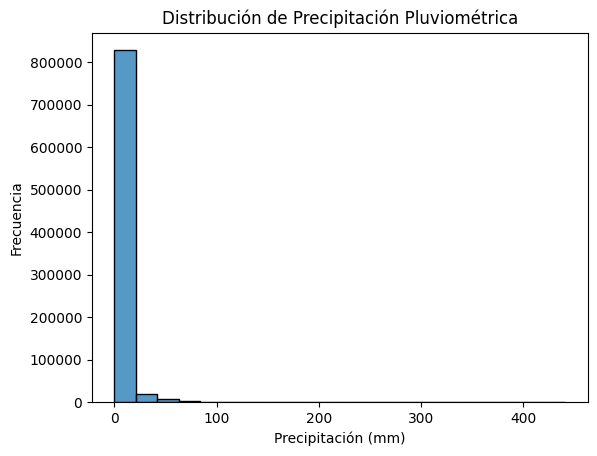

In [49]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Como vemos que los valores están muy dispersos a la izquierda, decidimos estandarizarlos para que el futuro modelo funcione mejor.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
df['precipitacion_pluviometrica_esc'] = scaler.fit_transform(df[["precipitacion_pluviometrica"]])
df.sample(3)

C:\Users\uriel\AppData\Local\Temp\ipykernel_29312\935217047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitacion_pluviometrica_esc'] = scaler.fit_transform(df[["precipitacion_pluviometrica"]])


,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media,precipitacion_pluviometrica_esc
726247,1986-07-14 00:00:00.0,NH0444,0.0,11.3,19.7,15.50000,86.0,13.10000,15.100000,3.90000,0.000000,0.0,3.200000,4.000000,-0.255487
180467,2014-03-24 00:00:00.0,A872862,NaN,11.3,27.0,18.28042,NaN,11.62028,13.706110,NaN,NaN,NaN,NaN,NaN,NaN
362478,2020-09-17 00:00:00.0,A872945,0.0,5.8,32.2,17.93889,32.0,2.82819,7.563658,16.87446,7.621486,64.0,5.980553,7.475691,-0.255487


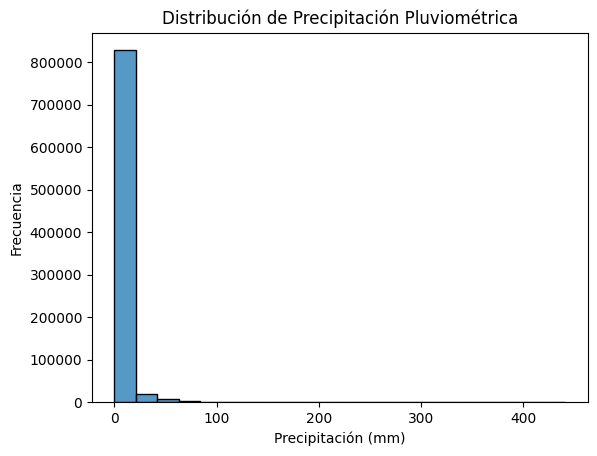

In [37]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Columnas `direccion_viento_1000cm` y `direccion_viento_200cm`

In [25]:
df[['direccion_viento_1000cm', 'direccion_viento_200cm']].value_counts()

direccion_viento_1000cm  direccion_viento_200cm
C                        C                         298104
                                                    34148
C                        E                          26543
                         W                          18554
                         S                          17979
                         NE                          8887
                         N                           5280
                         SE                          3981
                         NW                          2068
                         C                           1900
                         W                           1143
                         E                           1085
                         S                            978
                         NE                           893
                         N                            749
E                                                     328
                        

Cómo se observa, tiene muchos valores 'vacios'. A estos campos los voy a reemplazar por valores nulos para despues modificar todos estos juntos.

Columnas `humedad_media` y `humedad_media_8_14_20`

In [55]:
cond = (
    (df["humedad_media"].isnull() & df["humedad_media_8_14_20"].notnull()) |
    (df["humedad_media"].notnull() & df["humedad_media_8_14_20"].isnull())
)

filtrado_humedad = df.loc[cond, ["humedad_media", "humedad_media_8_14_20"]]

abs(filtrado_humedad.humedad_media_8_14_20 - filtrado_humedad.humedad_media)

44       NaN
63       NaN
68       NaN
69       NaN
70       NaN
          ..
923848   NaN
923851   NaN
923852   NaN
923858   NaN
923864   NaN
Length: 472524, dtype: float64

In [ ]:
humedad_notna = df[["humedad_media", "humedad_media_8_14_20"]].dropna()

np.abs(humedad_notna.humedad_media / humedad_notna.humedad_media_8_14_20).mean()

# lo hago con una division para asi obtener la razon relativa, que da una proporción: cuánto vale una respecto a la otra.
# me sirve más que hacerlo con una resta, que obtendria la diferencia absoluta entre una variable y otra.


np.float64(1.0756318358333181)

Aparentemente, las columnas difieren en promedio alrededor de un 1%, lo cual es un valor aceptable y no representa una gran diferencia. Con esta información, cuando alguna de las dos columnas tenga un valor nulo pero la otra no, se puede imputar el valor faltante utilizando la columna disponible, ya que ambas muestran una alta consistencia entre sí.

In [72]:
40/1.0756318358333181

37.187445246087414

In [ ]:
filtrado_humedad

,humedad_media,humedad_media_8_14_20
44,NaN,73.0
63,NaN,0.0
68,NaN,40.0
69,NaN,60.0
70,NaN,49.0
...,...,...
923848,NaN,45.0
923851,NaN,32.0
923852,NaN,44.0
923858,NaN,60.0


In [ ]:
import numpy as np
import pandas as pd

def imputar_por_relacion(df, col1, col2):
    """
    Imputa valores nulos entre dos columnas altamente correlacionadas
    usando la razón relativa promedio.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con las columnas.
    col1, col2 : str
        Nombres de las columnas a comparar.

    Retorna
    -------
    pd.DataFrame
        DataFrame con las imputaciones realizadas.
    """
    
    # Filtrar casos donde ambas columnas NO son nulas
    notna = df[[col1, col2]].dropna()
    
    # Calcular la razón relativa promedio
    ratio = np.abs(notna[col1] / notna[col2]).mean()
    
    # Crear copia del df para no modificar el original
    df_copy = df.copy()
    
    # Imputar valores faltantes en col1 con col2 ajustado
    df_copy.loc[df_copy[col1].isna() & df_copy[col2].notna(), col1] = \
        df_copy.loc[df_copy[col1].isna() & df_copy[col2].notna(), col2] * ratio
    
    # Imputar valores faltantes en col2 con col1 ajustado
    df_copy.loc[df_copy[col2].isna() & df_copy[col1].notna(), col2] = \
        df_copy.loc[df_copy[col2].isna() & df_copy[col1].notna(), col1] / ratio
    
    return df_copy
